In [1]:
import sys 
sys.path.append('./models/')
from SIR import SIRD_model, sir_for_optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [2]:
df = pd.read_csv('deaths_and_infections.csv')

# remove a columns from a df: 
df.drop(columns=['Unnamed: 0'], inplace=True)
new_deaths=np.array(df['new_deaths'])
death_cumul=np.array([sum(new_deaths[:i]) for i in range(len(new_deaths))])
dates_of_pandemic=np.arange(len(new_deaths))

In [3]:
mymodel = SIRD_model()  
mymodel.train(dates_of_pandemic[:33], new_deaths[:33])

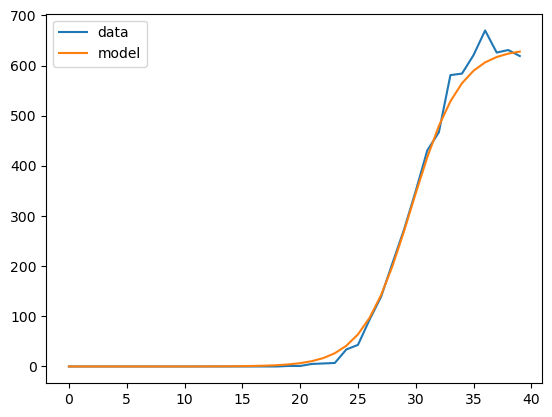

In [4]:
plt.plot(dates_of_pandemic[:40], new_deaths[:40], label='data')
pred=sir_for_optim(np.array([i for i in range(40)]), mymodel.beta, mymodel.gamma, mymodel.d)
plt.plot(dates_of_pandemic[:40], pred, label='model')
plt.legend()
plt.show()

In [5]:
pred, ints=mymodel.predict(7,0.05)

In [6]:
ints

[array([0., 0., 0., 0., 0., 0., 0.]),
 array([1609.36967872, 1668.0142494 , 1708.93784673, 1735.8957715 ,
        1752.70478478, 1762.5189392 , 1763.32362037])]

In [7]:
print(mymodel.beta, mymodel.gamma, mymodel.d)
print(mymodel.beta_sampled)

0.47469723393477037 1.1186056359623869e-17 0.0006394016064400492
[0.6302611352535166, 0.530516471232627, 0.38270378210432604, 0.6062990520151598, 0.6626728223422887, 0.3503849901084911, 0.6170145343801907, 0.6543674115354269, 0.5419498537498675, 0.5801554032972992, 0.6809682054678481, 0.3809294967779996, 0.4620757892663689, 0.2695780334311446, 0.38743531412037474, 0.3173232869816619, 0.3675390998565612, 0.4478973962021605, 0.5813392140690596, 0.7435807907444596, 0.44484509037110237, 0.8235430044318326, 0.4384248456221978, 0.6495328322770182, 0.6856921649624925, 0.4095407474867981, 0.6113710120909834, 0.37169352057160593, 0.3964503280294447, 0.4041971103729218, 0.44037007558050933, 0.16173499041753708, 0.45215396625760995, 0.5850514339462843, 0.48227805730091916, 0.3823305134866336, 0.35722304829022833, 0.5569068409020707, 0.3833105152848774, 0.41615846816344526, 0.286197056570634, 0.46950294449694513, 0.4446882665562327, 0.4861070233887339, 0.3543785143017828, 0.33888217629796497, 0.43

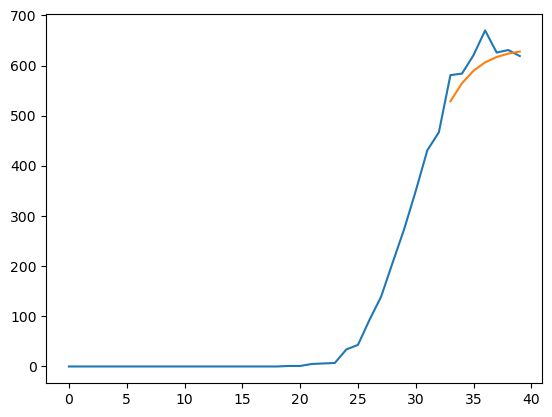

In [8]:
plt.plot(dates_of_pandemic[:40], new_deaths[:40], label='data')
plt.plot(dates_of_pandemic[33:40], pred, label='model')

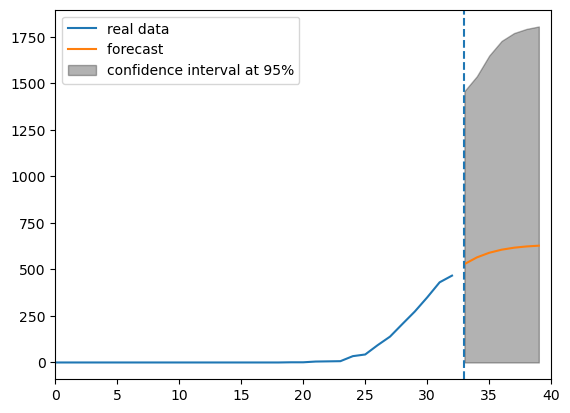

In [9]:
mymodel.plot(7,0.05)

In [10]:
beta=mymodel.beta
gamma=mymodel.gamma
d=mymodel.d

pred=sir_for_optim(np.array([i for i in range((122))]), beta, gamma, d)

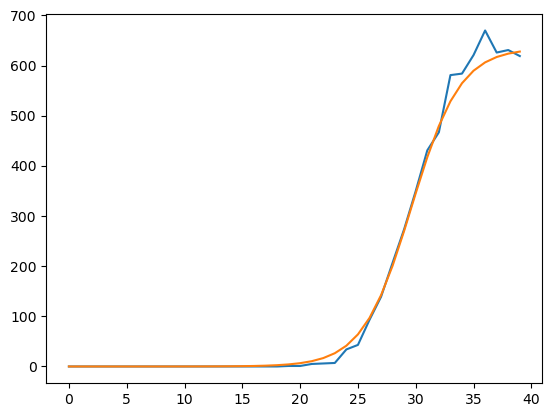

In [11]:
plt.plot(new_deaths[:40])
plt.plot(pred[:40])

In [12]:
def exponential_func(x, a, b, c):
    return a*np.exp(b*x)+c

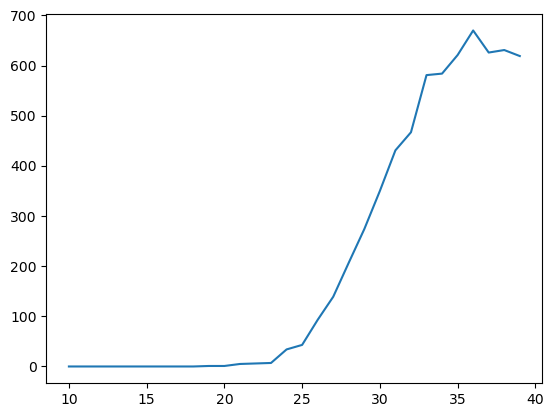

In [13]:
plt.plot(dates_of_pandemic[10:40], new_deaths[10:40])

[  1.27331544   0.18555633 -34.72327539]


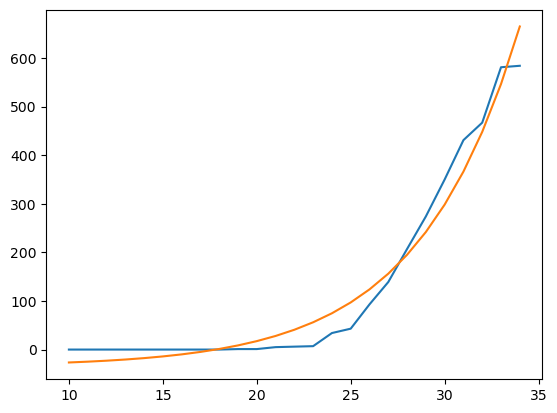

In [14]:
min=10
max=35
interval=[i for i in range(min,max)]
p, _ =curve_fit(exponential_func, dates_of_pandemic[interval], new_deaths[interval], p0=[ 1.33991316e+01 , 1.21453531e-01,  -1.92062731e+02]

, maxfev = 10000)
print(p)
plt.plot(dates_of_pandemic[interval], new_deaths[interval])
plt.plot(dates_of_pandemic[interval], exponential_func(dates_of_pandemic[interval], *p))


Caching the list of root modules, please wait!
(This will only be done once - type '%rehashx' to reset cache!)



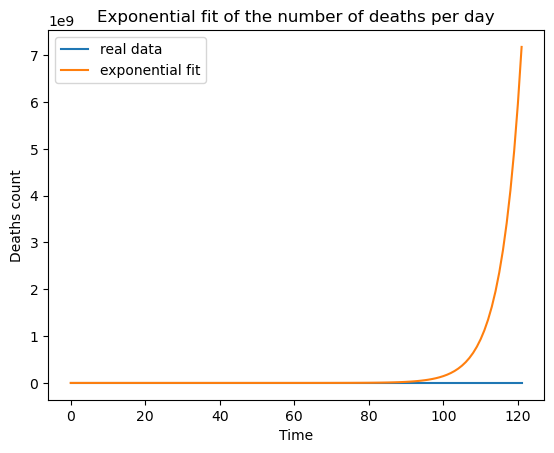

In [15]:
plt.plot(dates_of_pandemic,new_deaths, label='real data')
plt.plot(dates_of_pandemic, exponential_func(dates_of_pandemic, *p), label= 'exponential fit')
plt.title('Exponential fit of the number of deaths per day')
plt.xlabel('Time')
plt.ylabel('Deaths count')

plt.legend()
plt.show()

In [1]:
import sys
sys.path.append('./models/')
from Arima import ARIMA_Model
from SIR  import SIRD_model
from exponential_regression import ExponentialRegression
from moving_average import MovingAverage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('deaths_and_infections.csv')

# remove a columns from a df: 
df.drop(columns=['Unnamed: 0'], inplace=True)
new_deaths=np.array(df['new_deaths'])
death_cumul=np.array([sum(new_deaths[:i]) for i in range(len(new_deaths))])
dates_of_pandemic=np.arange(len(new_deaths))

plot of sird with covariance method with multivariate sampling: 



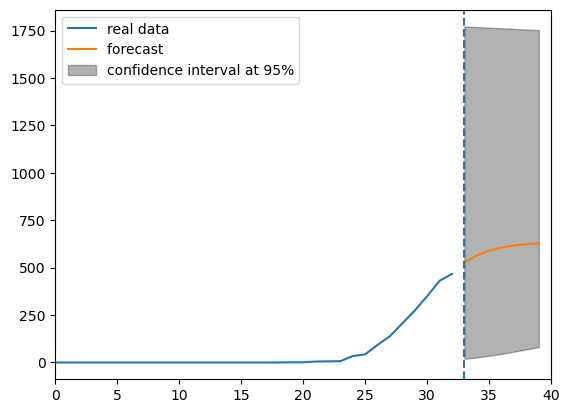

In [2]:
mySIRD = SIRD_model()

mySIRD.train(dates_of_pandemic[:33], new_deaths[:33])
mySIRD.plot(7,0.05)

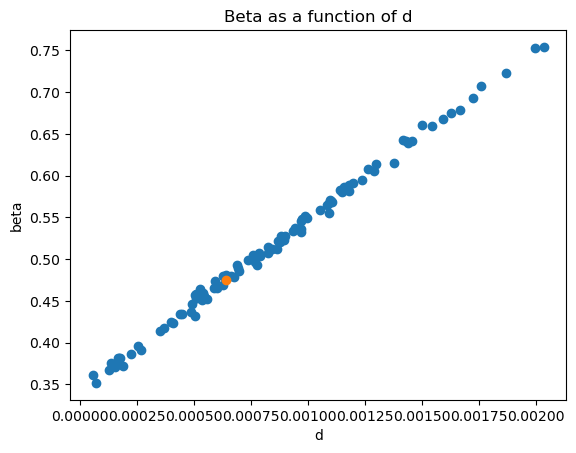

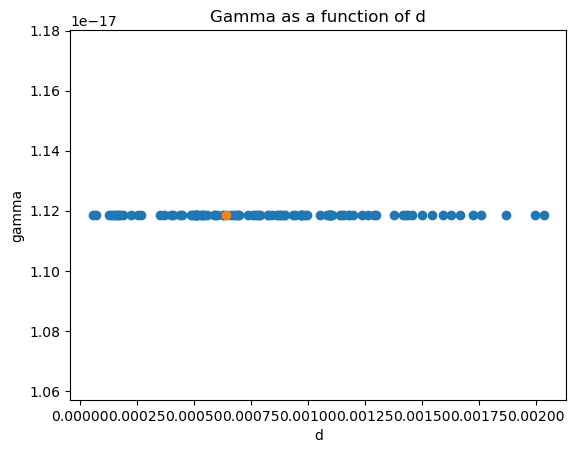

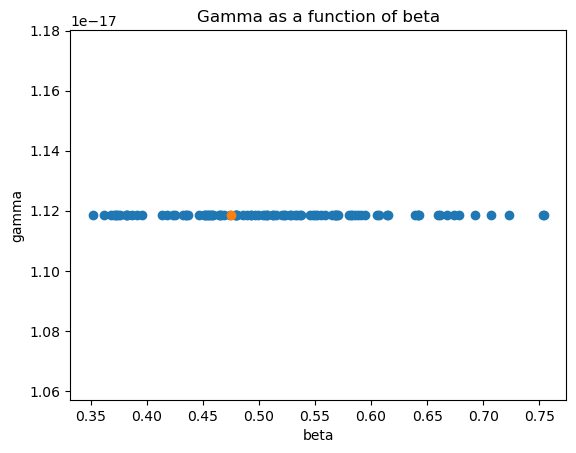

In [3]:
d_sampled=mySIRD.d_sampled
beta_sampled=mySIRD.beta_sampled
gamma_sampled=mySIRD.gamma_sampled
gamma=mySIRD.gamma

d=mySIRD.d
beta=mySIRD.beta
gamma_sampled=mySIRD.gamma_sampled
plt.plot(d_sampled, beta_sampled, 'o')
plt.plot(d, beta, 'o')
plt.xlabel('d')
plt.ylabel('beta')
plt.title('Beta as a function of d')
plt.show()

plt.plot(d_sampled, gamma_sampled, 'o')
plt.plot(d, gamma, 'o')
plt.xlabel('d')
plt.ylabel('gamma')
plt.title('Gamma as a function of d')
plt.show()

plt.plot(beta_sampled, gamma_sampled, 'o')
plt.plot(beta, gamma, 'o')
plt.xlabel('beta')
plt.ylabel('gamma')
plt.title('Gamma as a function of beta')
plt.show()


In [ ]:
np

In [15]:
# recupérer la sous matrice de la matrice de corrélation
matrix=np.array([[1,2,3],[4,5,6],[7,8,9]])
def get_sousmatrice(matrix): 
    result=np.zeros((2,2))

    result[0][0]=matrix[0][0]
    result[0][1]=matrix[0][2]
    result[1][0]=matrix[2][0]
    result[1][1]=matrix[2][2]
    return result
get_sousmatrice(matrix)

array([[1., 3.],
       [7., 9.]])

In [16]:
beta_sampled=[]
gamma_sampled=[]
d_sampled=[]
cov_2=get_sousmatrice(mySIRD.cov)
for i in range(1000):
    a=np.random.multivariate_normal([mySIRD.beta,mySIRD.d], cov_2, 1)[0]
    while not (a>0).all(): 
        a=np.random.multivariate_normal([mySIRD.beta,mySIRD.d], cov_2, 1)[0]
    beta_sampled.append(a[0])
    d_sampled.append(a[1])
    

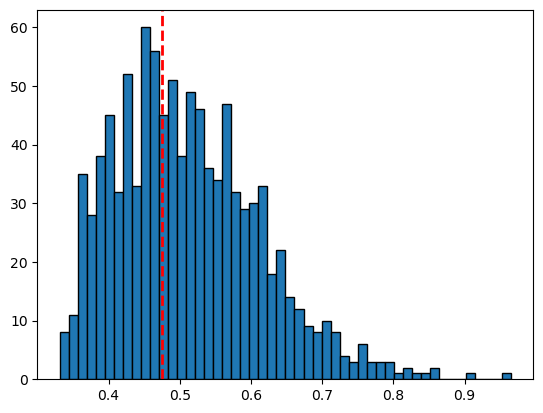

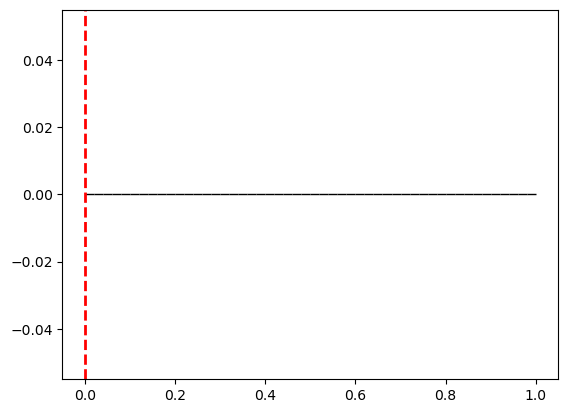

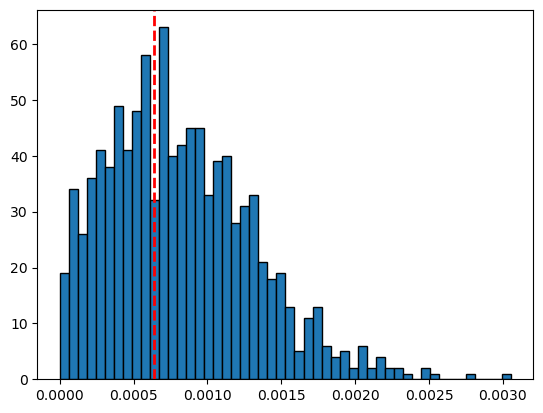

In [17]:
plt.hist(beta_sampled, bins=50, edgecolor='black')
plt.axvline(mySIRD.beta, color='r', linestyle='dashed', linewidth=2)
plt.show()
plt.hist(gamma_sampled, bins=50, edgecolor='black')
plt.axvline(mySIRD.gamma, color='r', linestyle='dashed', linewidth=2)
plt.show()
plt.hist(d_sampled, bins=50, edgecolor='black')
plt.axvline(mySIRD.d, color='r', linestyle='dashed', linewidth=2)
plt.show()


0.47469723393477037


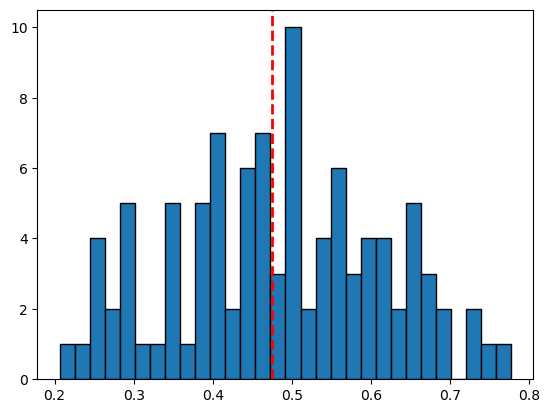

1.1186056359623869e-17


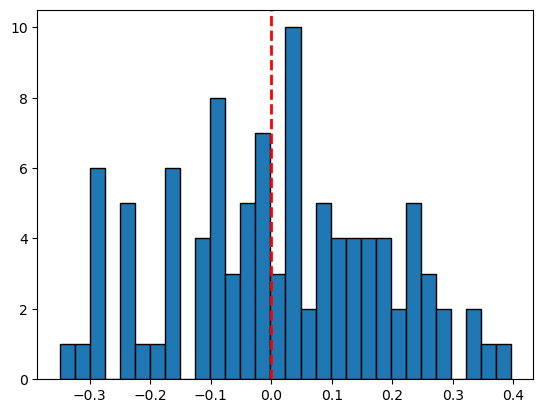

0.0006394016064400492


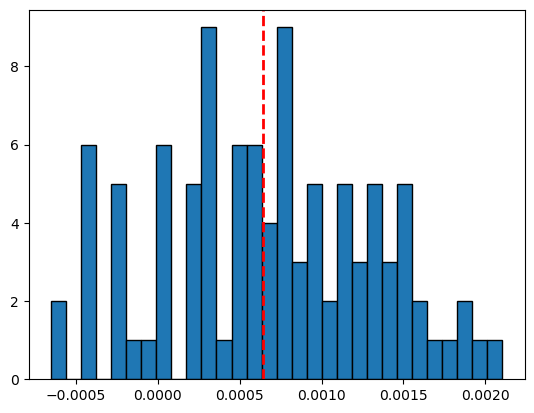

In [3]:
print(mySIRD.beta)
mySIRD.cov
plt.hist(mySIRD.beta_sampled, bins=30, edgecolor='black')
plt.axvline(mySIRD.beta, color='r', linestyle='dashed', linewidth=2)
plt.show()
print(mySIRD.gamma)
plt.hist(mySIRD.gamma_sampled, bins=30, edgecolor='black')
plt.axvline(mySIRD.gamma, color='r', linestyle='dashed', linewidth=2)
plt.show()
print(mySIRD.d)
plt.hist(mySIRD.d_sampled, bins=30, edgecolor='black')
plt.axvline(mySIRD.d, color='r', linestyle='dashed', linewidth=2)
plt.show()



Plot of sir with hessian method : 

hessian


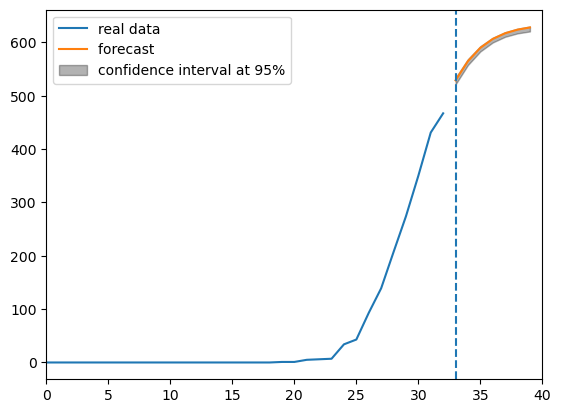

In [2]:
mySIRD = SIRD_model()
mySIRD.train(dates_of_pandemic[:33], new_deaths[:33])
mySIRD.plot(7,0.05)

c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


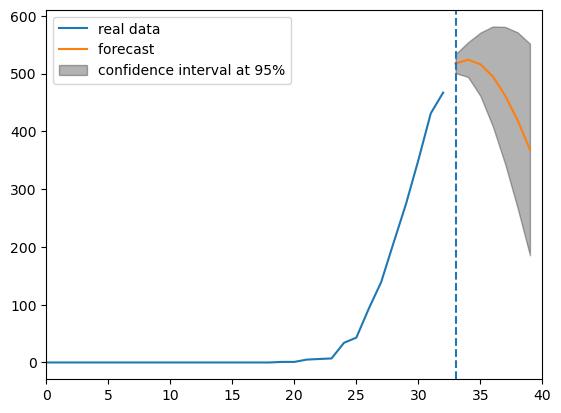

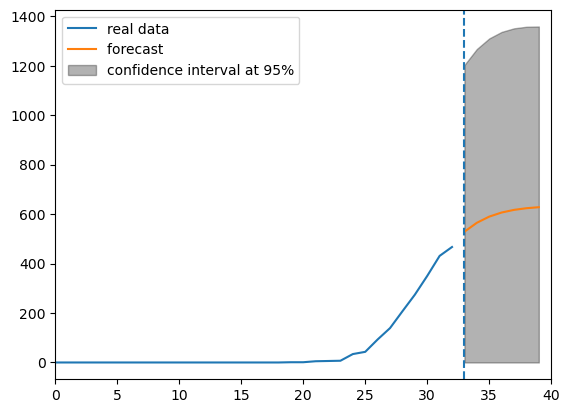

hessian


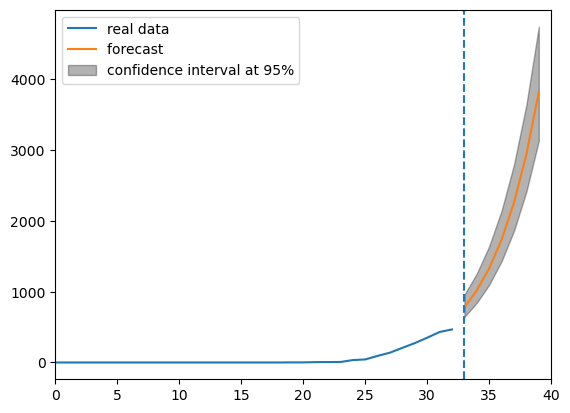

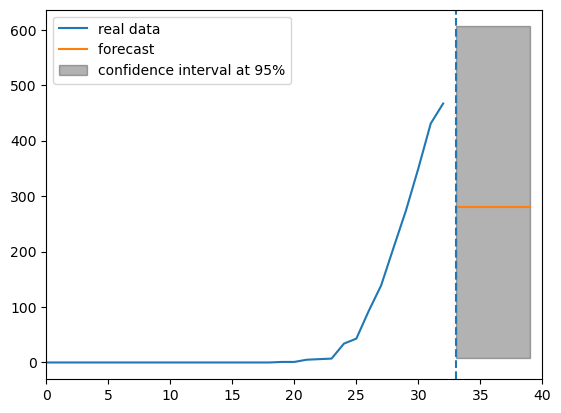

In [3]:
myarima=ARIMA_Model()
mySIRD=SIRD_model()
myexp=ExponentialRegression()
mymoving=MovingAverage()
myarima.train(dates_of_pandemic[:33], new_deaths[:33])
mySIRD.train(dates_of_pandemic[:33], new_deaths[:33])
myexp.train(dates_of_pandemic[:33], new_deaths[:33])
mymoving.train(dates_of_pandemic[:33], new_deaths[:33])
myarima.plot(7,0.05)
mySIRD.plot(7,0.05)
myexp.plot(7,0.05)
mymoving.plot(7,0.05)

In [3]:
mySIRD.cov

array([[1.67448710e-02, 2.18572503e-02, 8.11275538e-05],
       [2.18572503e-02, 2.85381803e-02, 1.05969916e-04],
       [8.11275538e-05, 1.05969916e-04, 3.93786188e-07]])

In [10]:
a=np.random.multivariate_normal([0,0,0], mySIRD.cov, 1000)

In [14]:
betas=[a[i][0] for i in range(len(a))]
gammas=[a[i][1] for i in range(len(a))]
ds=[a[i][2] for i in range(len(a))]


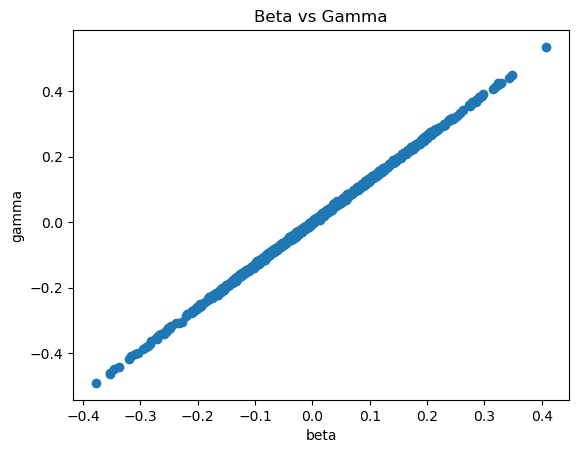

In [22]:
%matplotlib inline
plt.plot(betas, gammas, 'o')
plt.xlabel('beta')
plt.ylabel('gamma')
plt.title('Beta vs Gamma')
plt.show()

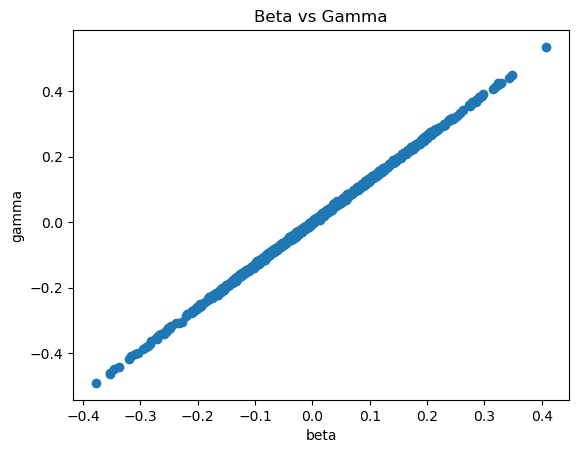

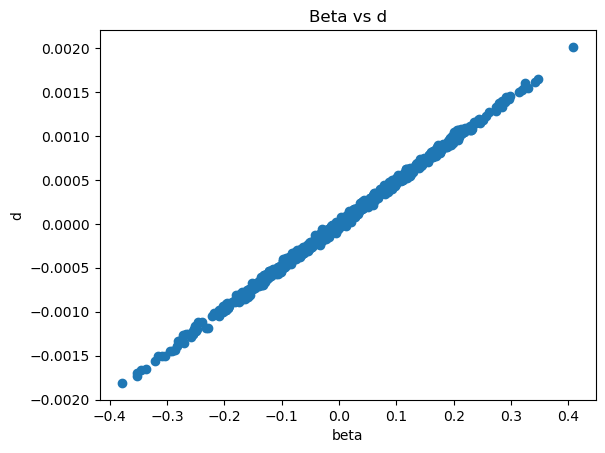

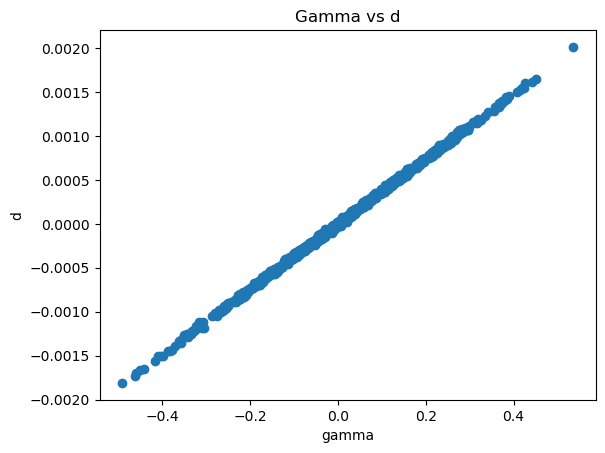

In [19]:
plt.plot(betas, gammas, 'o')
plt.xlabel('beta')
plt.ylabel('gamma')
plt.title('Beta vs Gamma')
plt.show()
plt.plot(betas, ds, 'o')
plt.xlabel('beta')
plt.ylabel('d')
plt.title('Beta vs d')
plt.show()
plt.plot(gammas, ds, 'o')
plt.xlabel('gamma')
plt.ylabel('d')
plt.title('Gamma vs d')
plt.show()


**Evaluating models**

In [1]:
import sys
sys.path.append('./models/')
from Arima import ARIMA_Model
from SIR  import SIRD_model
from exponential_regression import ExponentialRegression
from moving_average import MovingAverage
import pandas as pd
import numpy as np
from evaluate_model import evaluate_model
df = pd.read_csv('deaths_and_infections.csv')

# remove a columns from a df: 
df.drop(columns=['Unnamed: 0'], inplace=True)
new_deaths=np.array(df['new_deaths'])
death_cumul=np.array([sum(new_deaths[:i]) for i in range(len(new_deaths))])
dates_of_pandemic=np.arange(len(new_deaths))



In [9]:
myarima=ARIMA_Model()
mysir=SIRD_model()
myexp=ExponentialRegression()
mymoving=MovingAverage()
alphas=[0.05,0.1,0.5]
index_points=[40,50,75]
reach=7
weights=[1,1,1,1]


In [3]:
evaluate_model(model=mysir, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

hessian
hessian
hessian
hessian
hessian
hessian
hessian
hessian
hessian


1074.445379464554

In [10]:
evaluate_model(model=myexp, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

40
hessian
hessian
hessian
50
hessian
hessian
hessian
75
hessian
hessian
hessian


1.6293653374016092e+137

In [7]:
evaluate_model(model=myarima, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


259.0615781299235

In [8]:
evaluate_model(model=mymoving, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

2359.0683868254123